 # <center> MITgcm Channel </center> #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
import layers_calc_numba
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline


In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

# <center> Full Topography Runs </center> ##

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

## $ROC_{iso} (y,z)$ ##

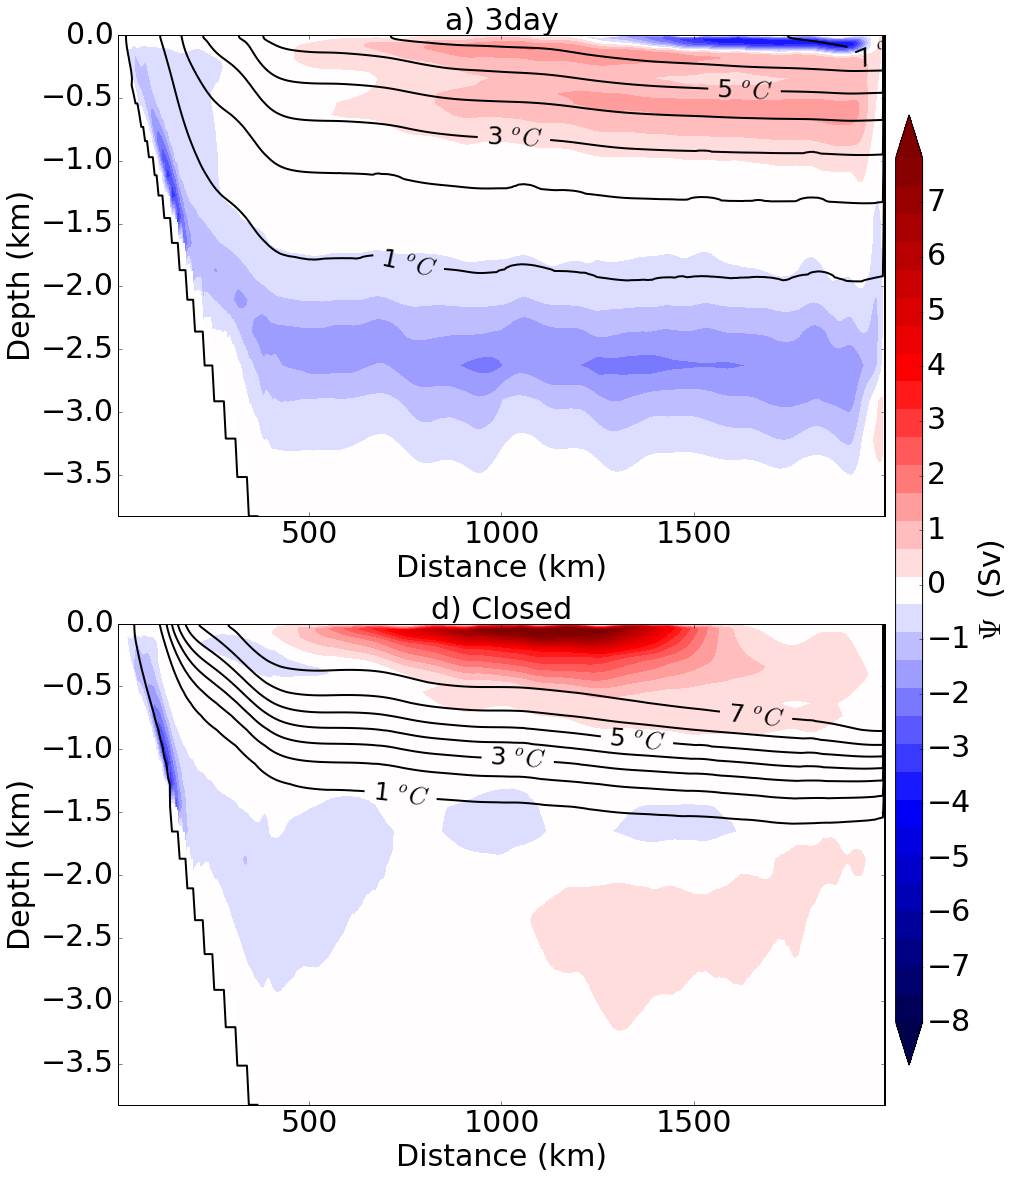

In [9]:
fig = plt.figure(figsize=(12.5, 16.5))
# Create Panels
Psi_levs = np.arange(-8., 8., .51)
Psi_ticks =np.arange(-8., 8., 1.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Psi = c.get_psi_iso_z()/10**6
    lmsk = c.HFacC.mean(axis=2)
    Psi[lmsk==0] = np.nan
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2 )
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

## MOC (y,z) ##

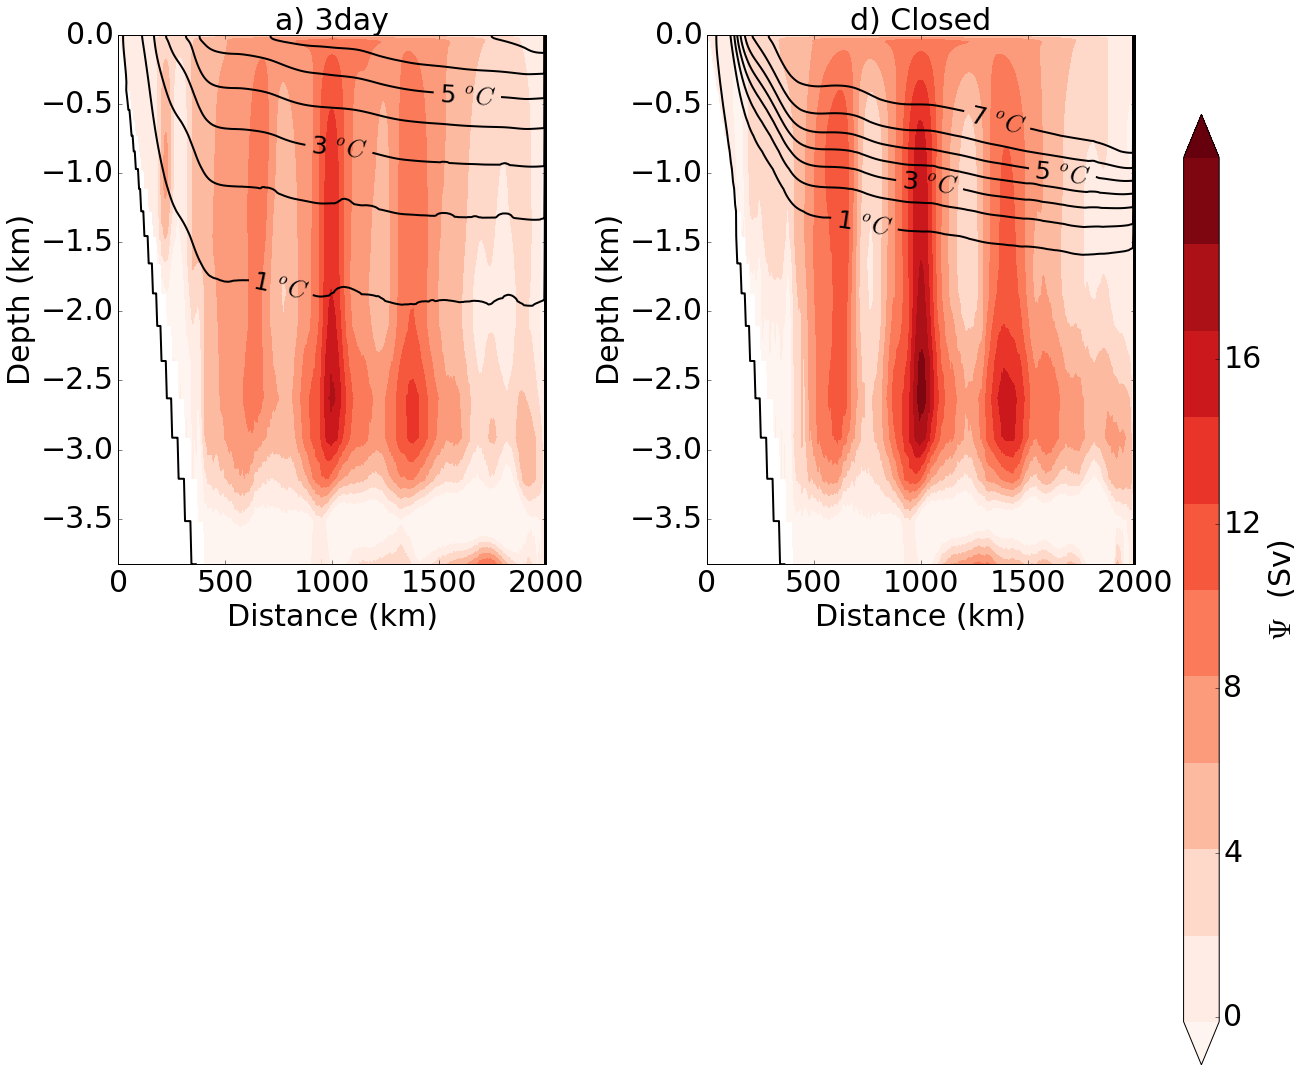

In [10]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.1, 21., 2.1)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Psi = c.get_psi_bar()/10**6
    lmsk = c.HFacS.mean(axis=2)
    Psi[lmsk==0] = np.nan
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yg/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.Reds, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'Psied' is not defined

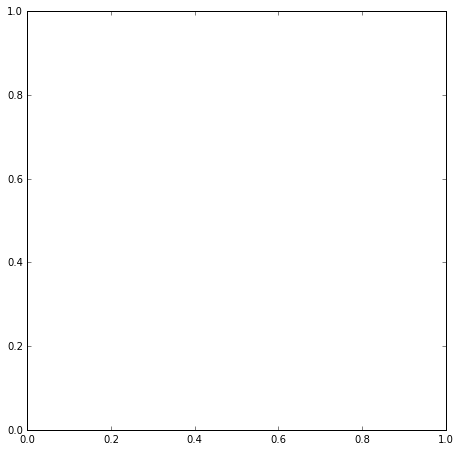

In [11]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-20., 2., 2.)
Psi_ticks =np.arange(-20., 2., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = layers_calc_numba.LayersComputer(c)
    lvrho , th = g.compute_vflux()
    V = lvrho.mean(axis=2)
    psi = -V.cumsum(axis=0)*c.Lx/10**6
    psied = c.vgrid_to_cgrid(c.get_psi_iso()/10**6) - psi
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                Psied, Psi_levs, cmap=plt.cm.Blues_r, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2 )
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

# $ \bar U $ #

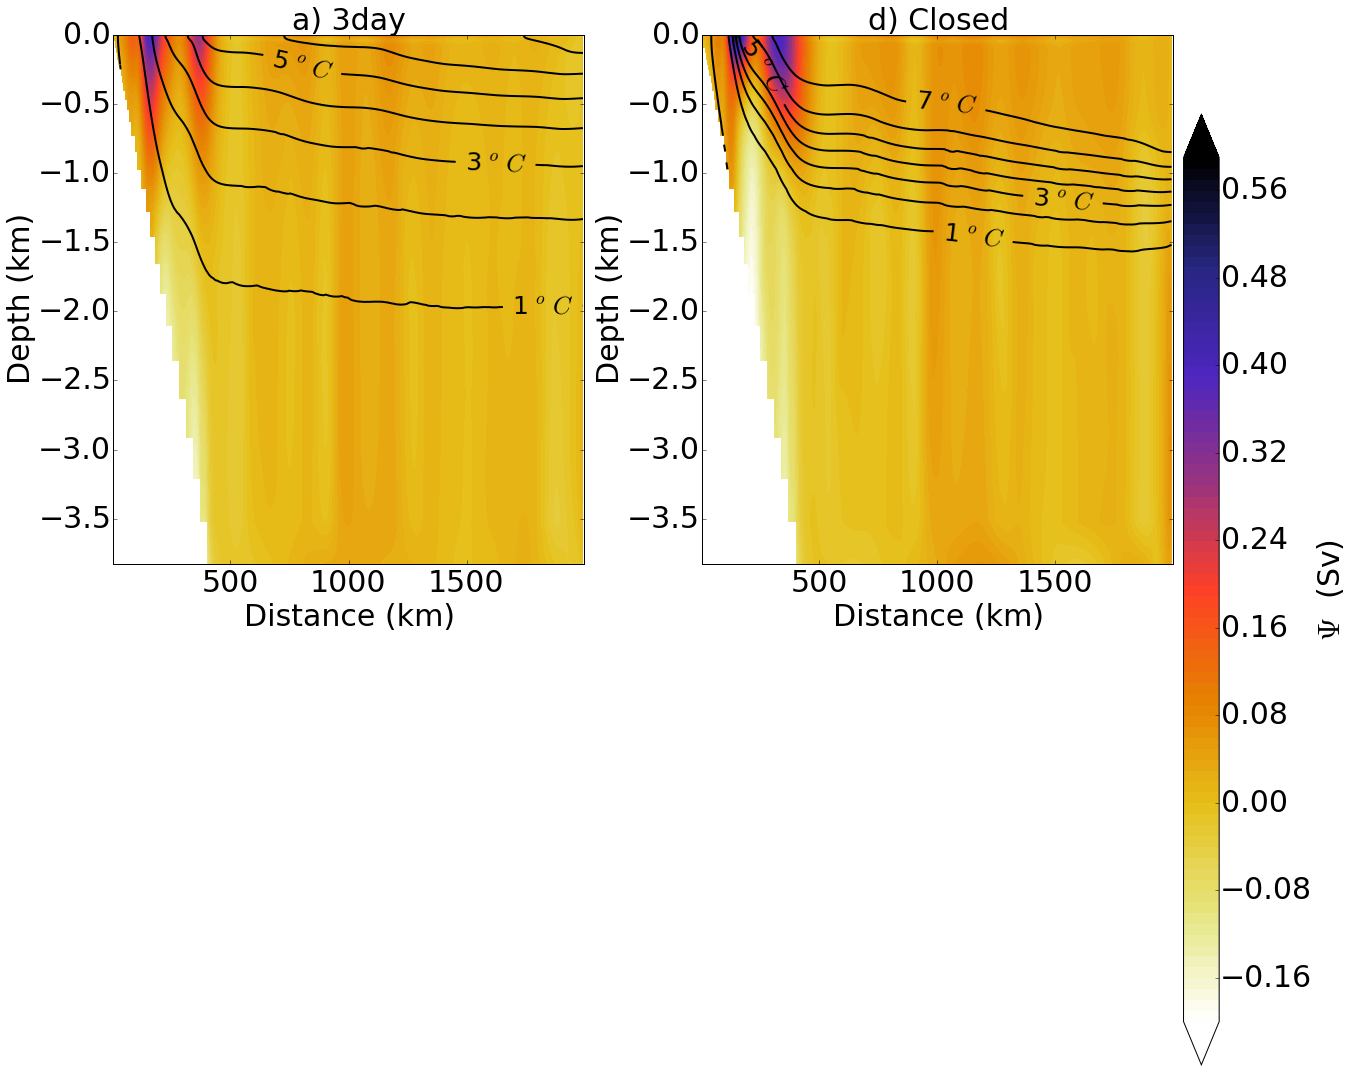

In [23]:

fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.2, .6, .01)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Ubar = c.get_zonal_avg('Tav.nc','UVEL',mask=c.HFacW) 
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              Ubar ,Psi_levs , cmap=cm.CMRmap_r, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA',mask=c.HFacC), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


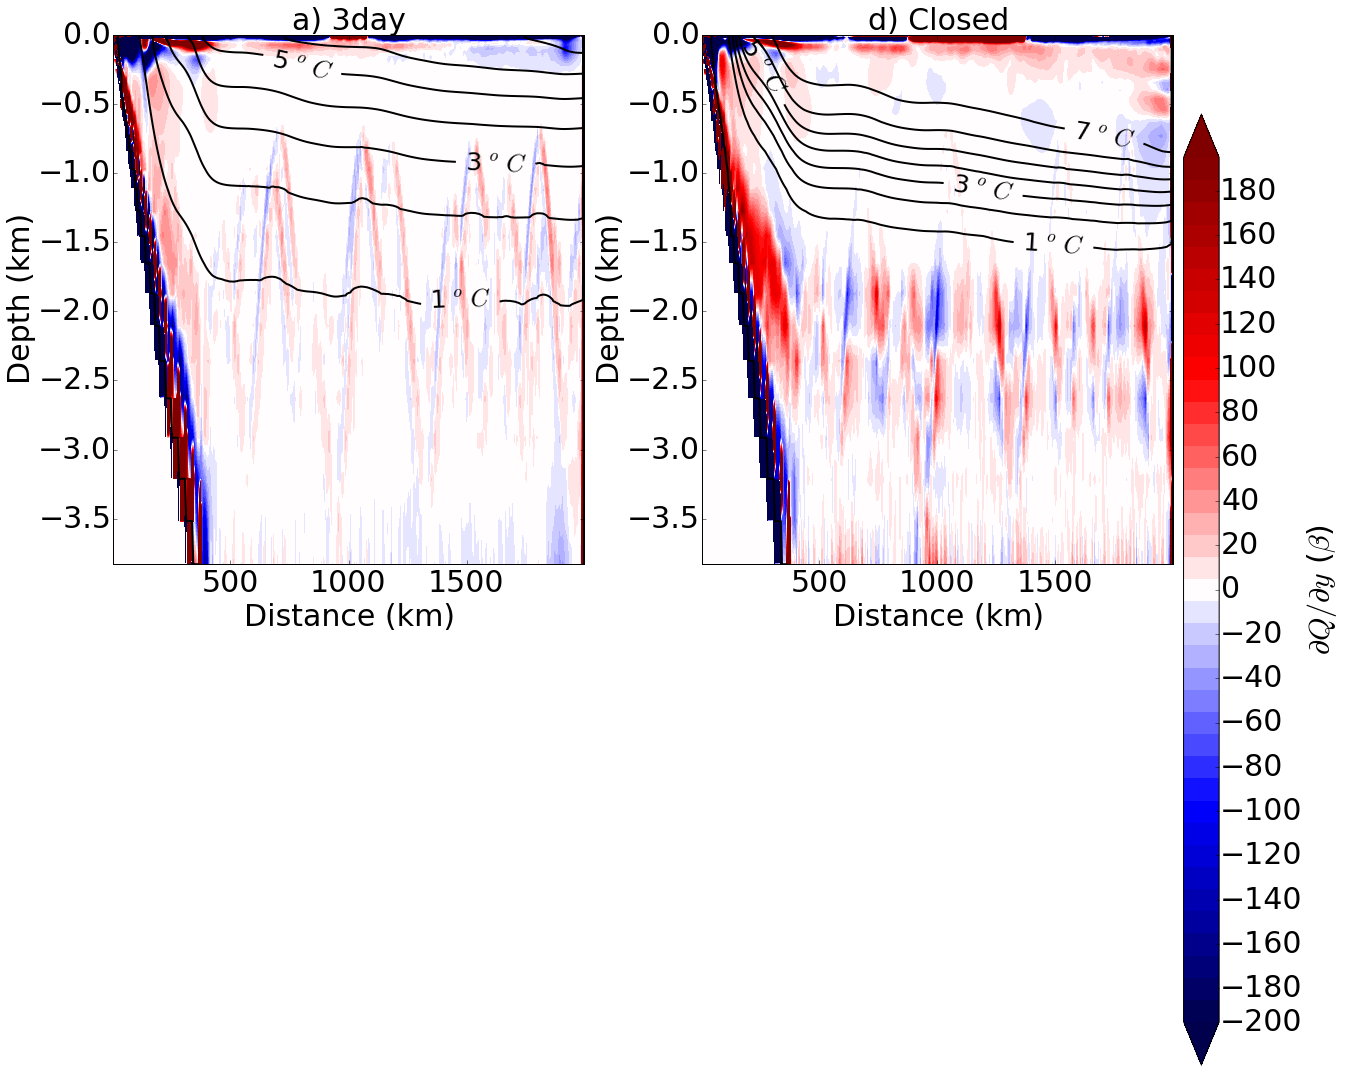

In [5]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-20,20)+0.5)
Q_ticks = np.arange(-20., 20., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    #title(r'$\partial Q / \partial y$ ($\beta$) - ', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                c.get_qgpv_grad()/c.beta, Q_levs*10, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Q_ticks*10)
cbar.ax.set_ylabel(r'$\partial Q / \partial y$ ($\beta$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)


# <center> Stream wise transports </center> #

When topography is included we see the zonal averaged streamfuctions are not the best picture!

Szoeke and Levine define $\Theta$ (depth averaged temperature):

\begin{equation}
\Theta (x,y) = \frac{1}{H} \int_{-H}^{0} \bar \theta \mathrm{d}z
\end{equation}

as a good arrproximate streamwise co-ordinate

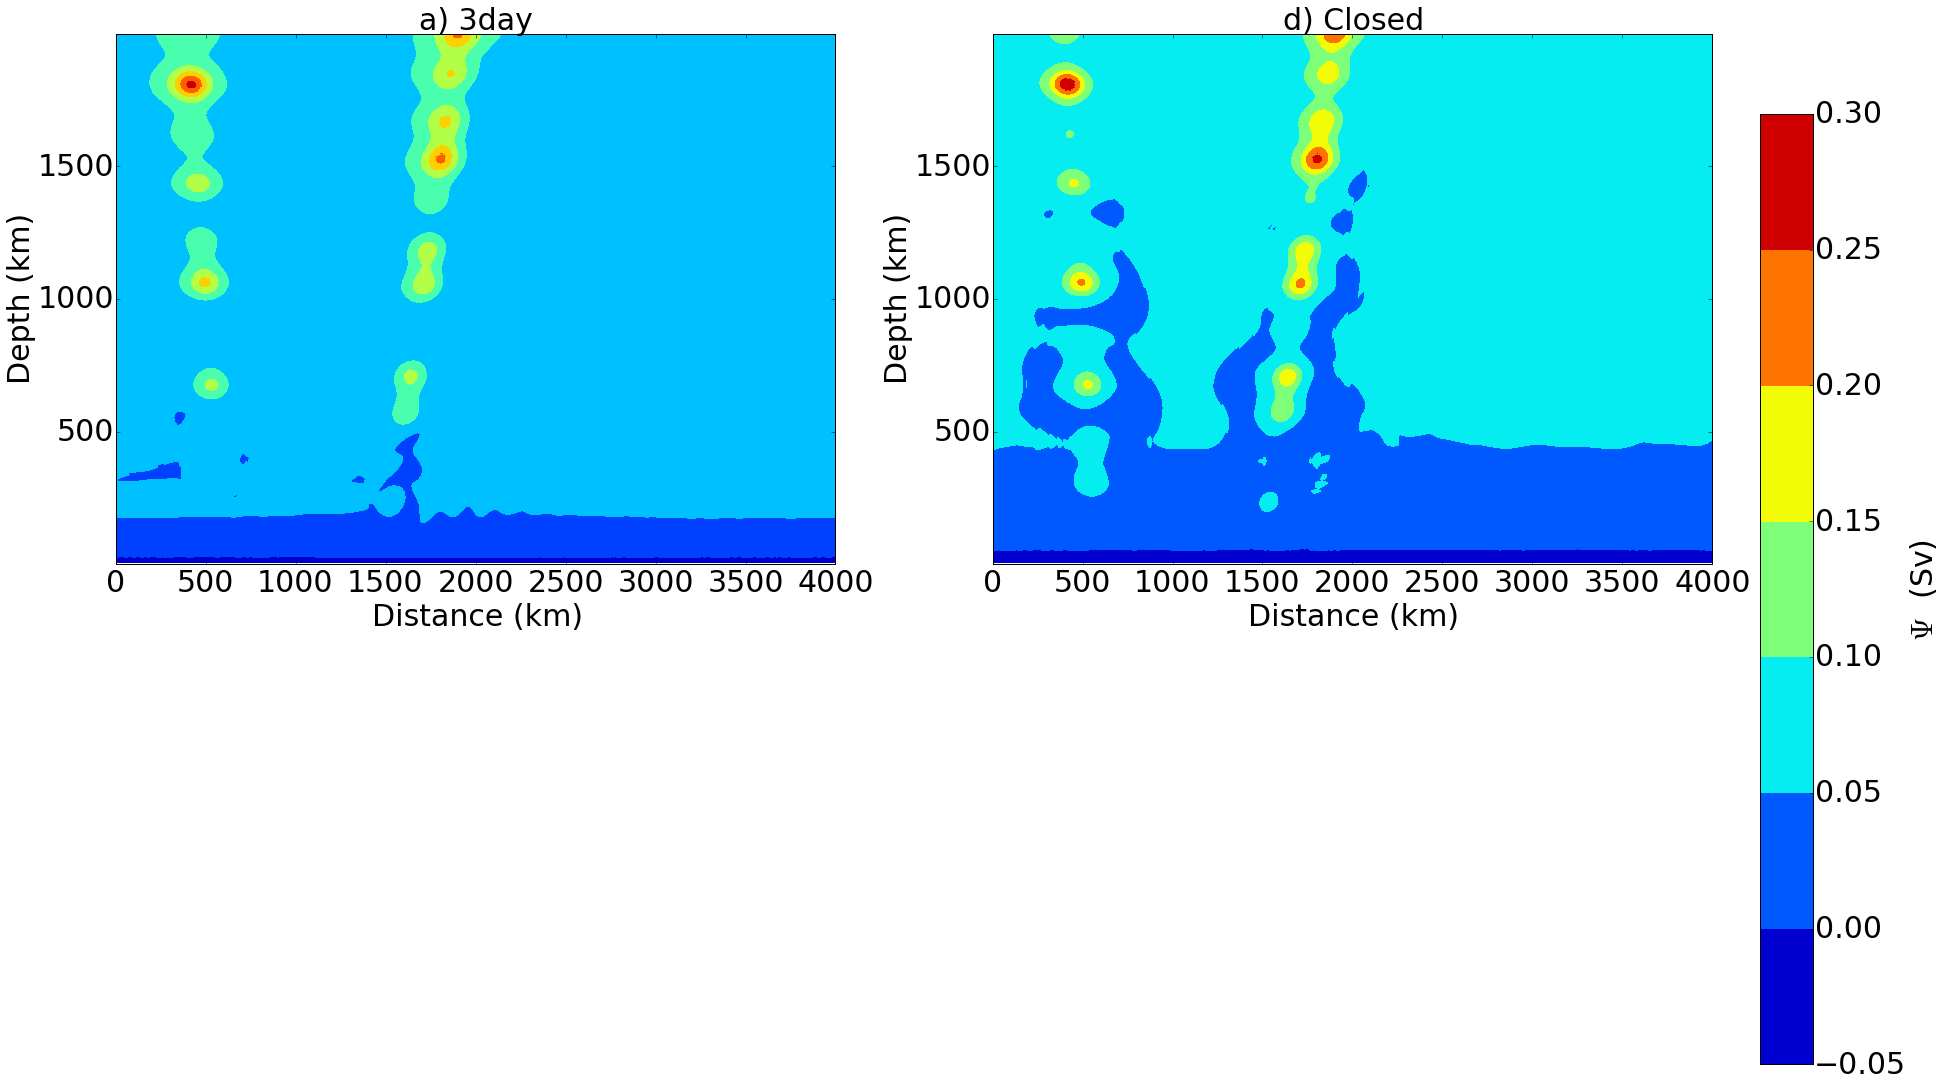

In [12]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-10.2, 3.4, .4)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
               c.depth_average(c.mnc('Tav.nc','THETA',mask=c.HFacC) ), cmap=cm.jet)

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

Or you can use the barotropic streamfunction:
\begin{equation}
\Psi (x,y) = - \int_0^y \int_{-H}^0 \bar v \mathrm{d}z\mathrm{d}y'
\end{equation}

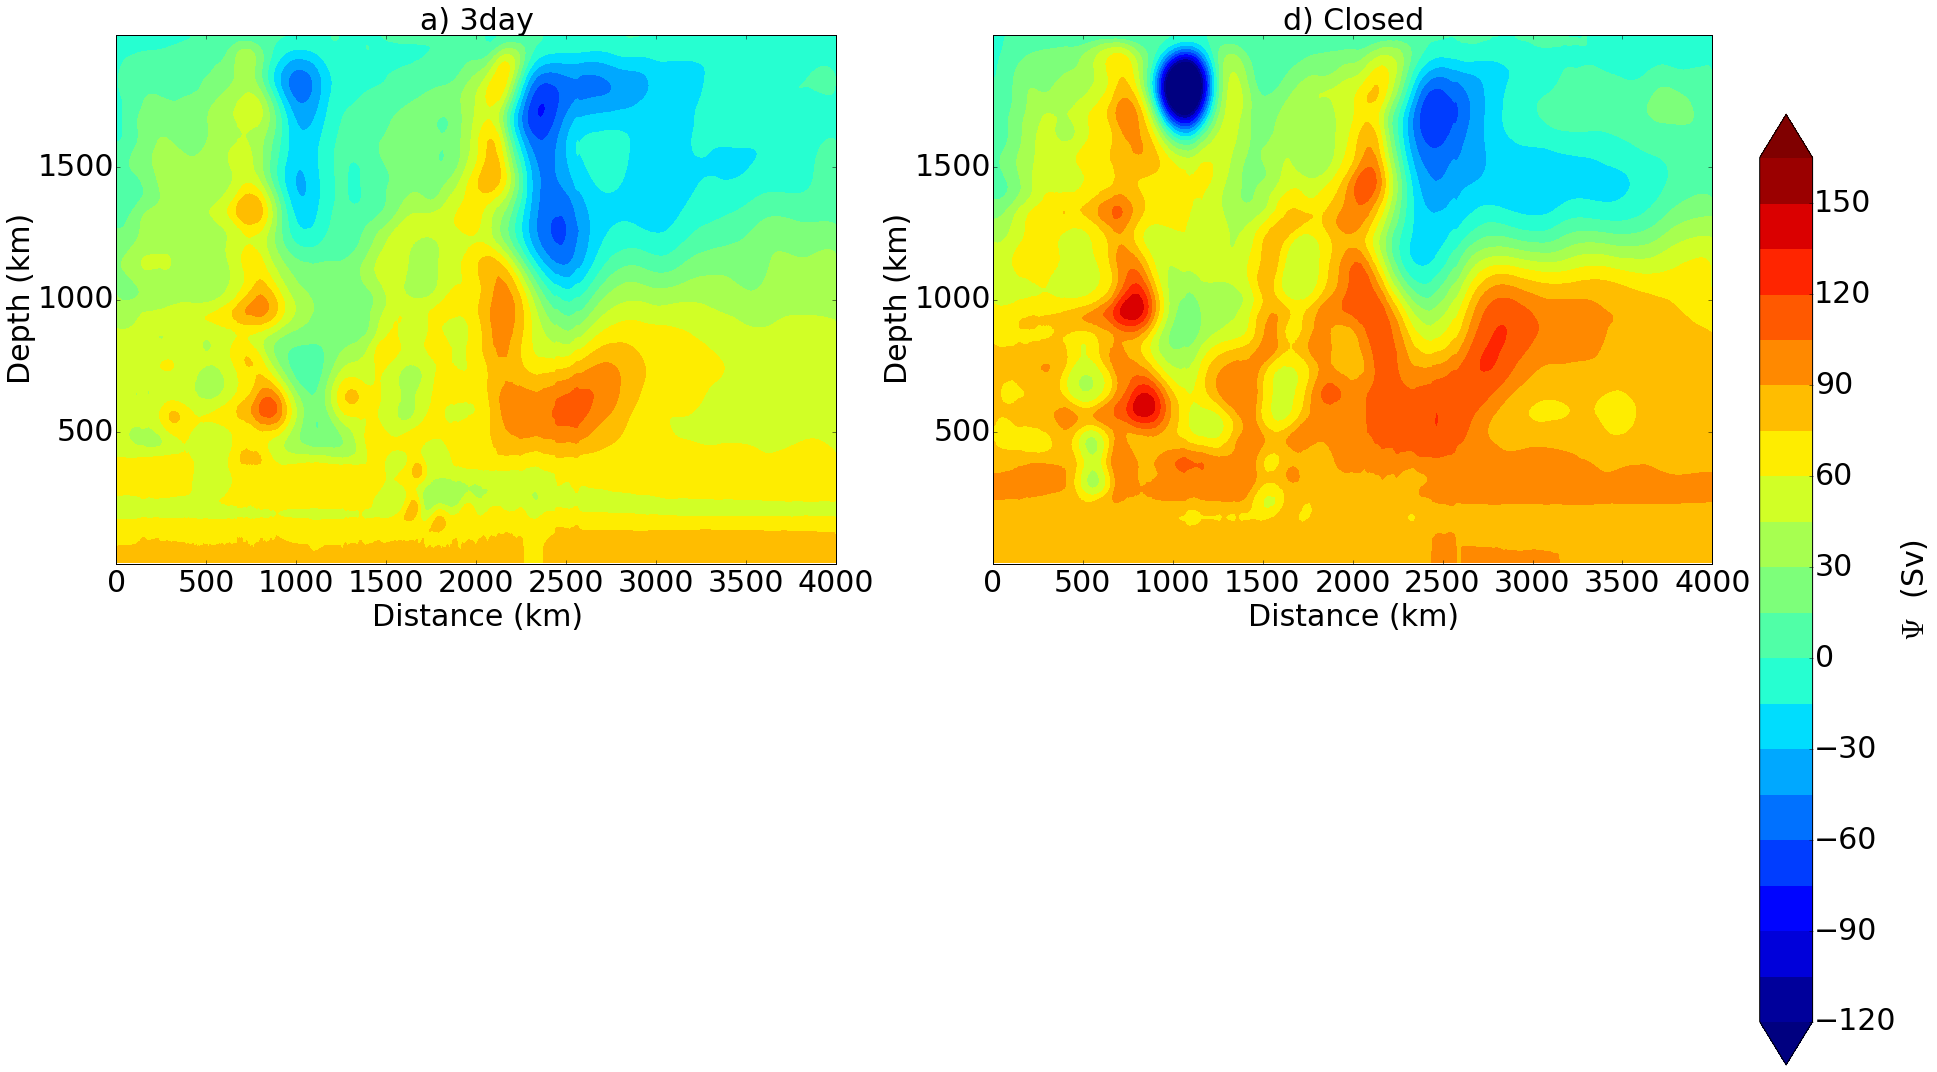

In [9]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-120, 180, 15)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))

    
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xg/1000, c.yc/1000,
                c.barotropic_streamfuc() , Psi_levs,cmap=cm.jet, extend='both')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

Model streamfunction


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in divide


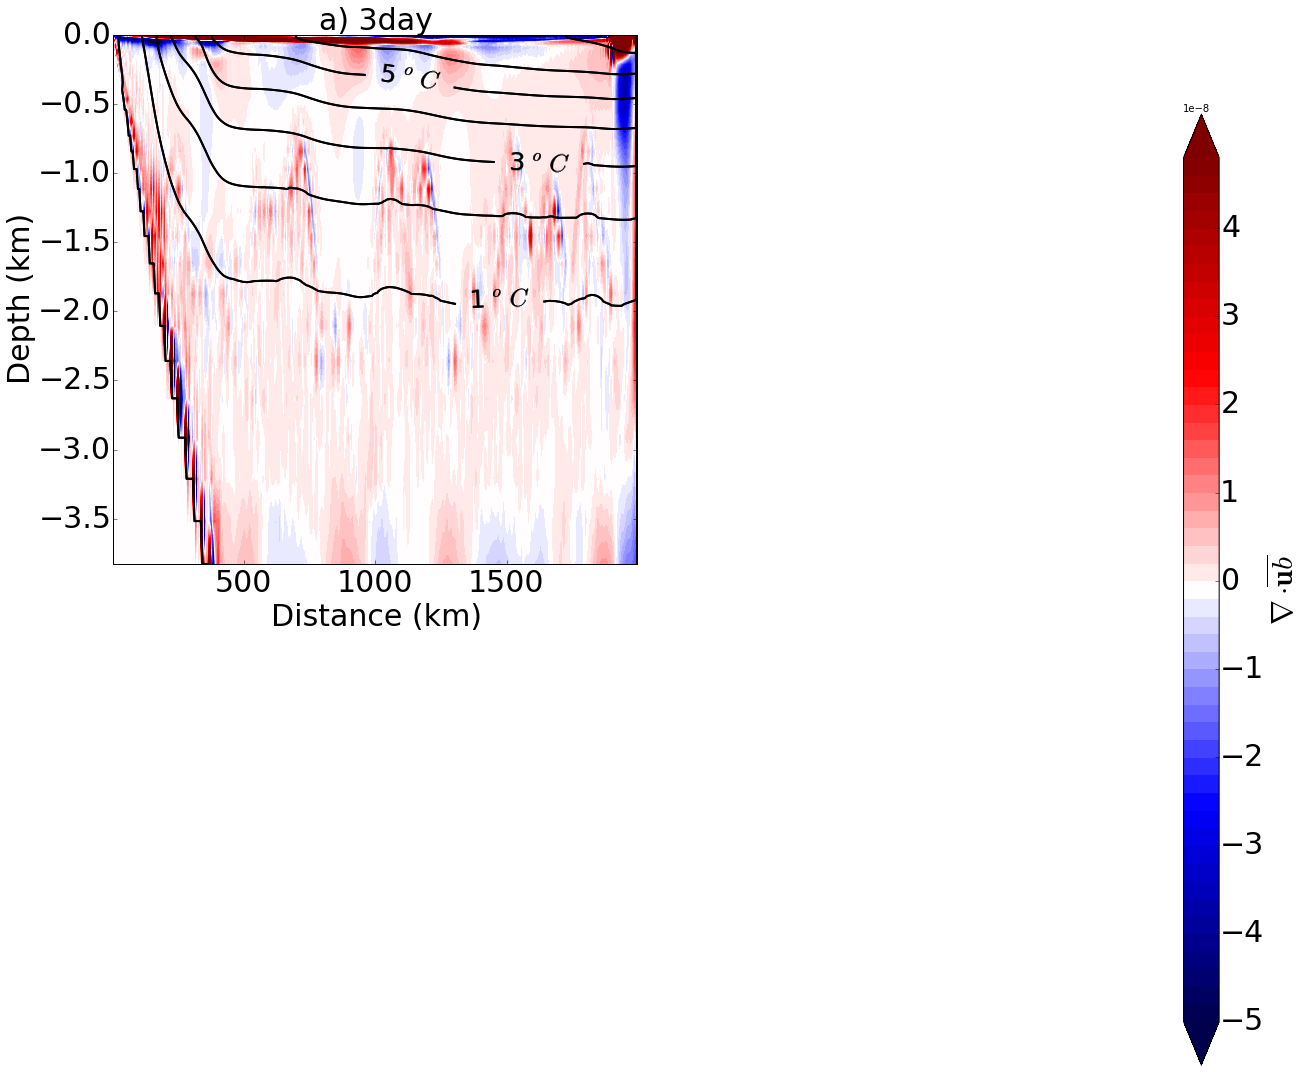

In [64]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-5,5,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    i = 0 
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (c.ddy_cgrid_centered(VT.mean(axis=2)) + c.ddz_cgrid_centered(WT.mean(axis=2))) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in divide


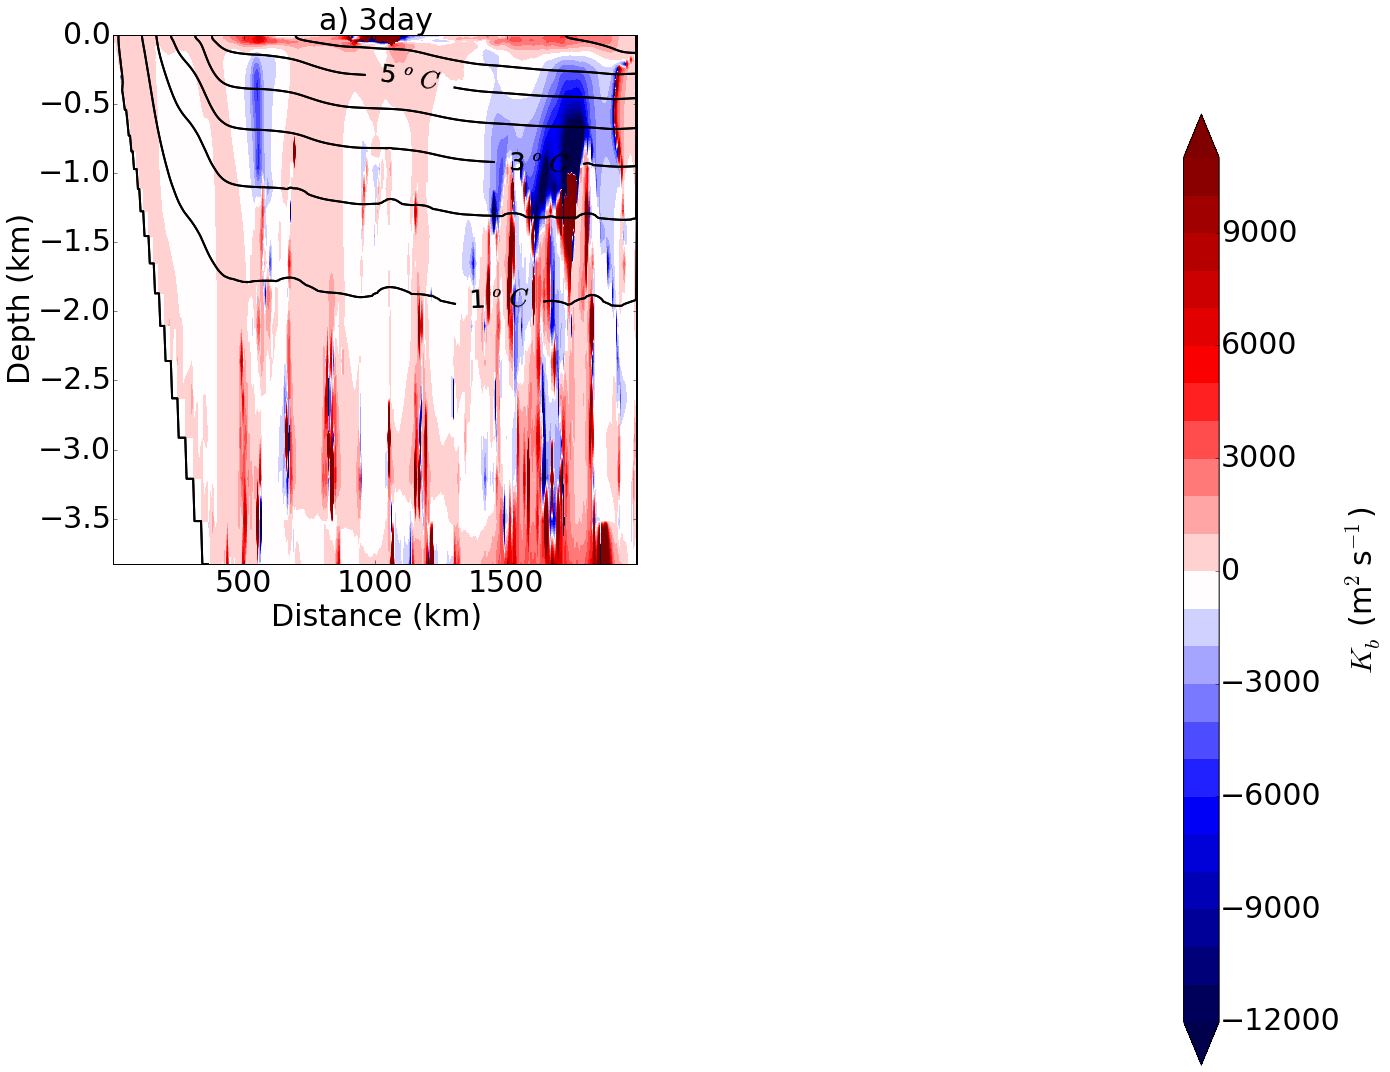

In [65]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-12000,12000,1000))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    i = 0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000, Kb , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in divide


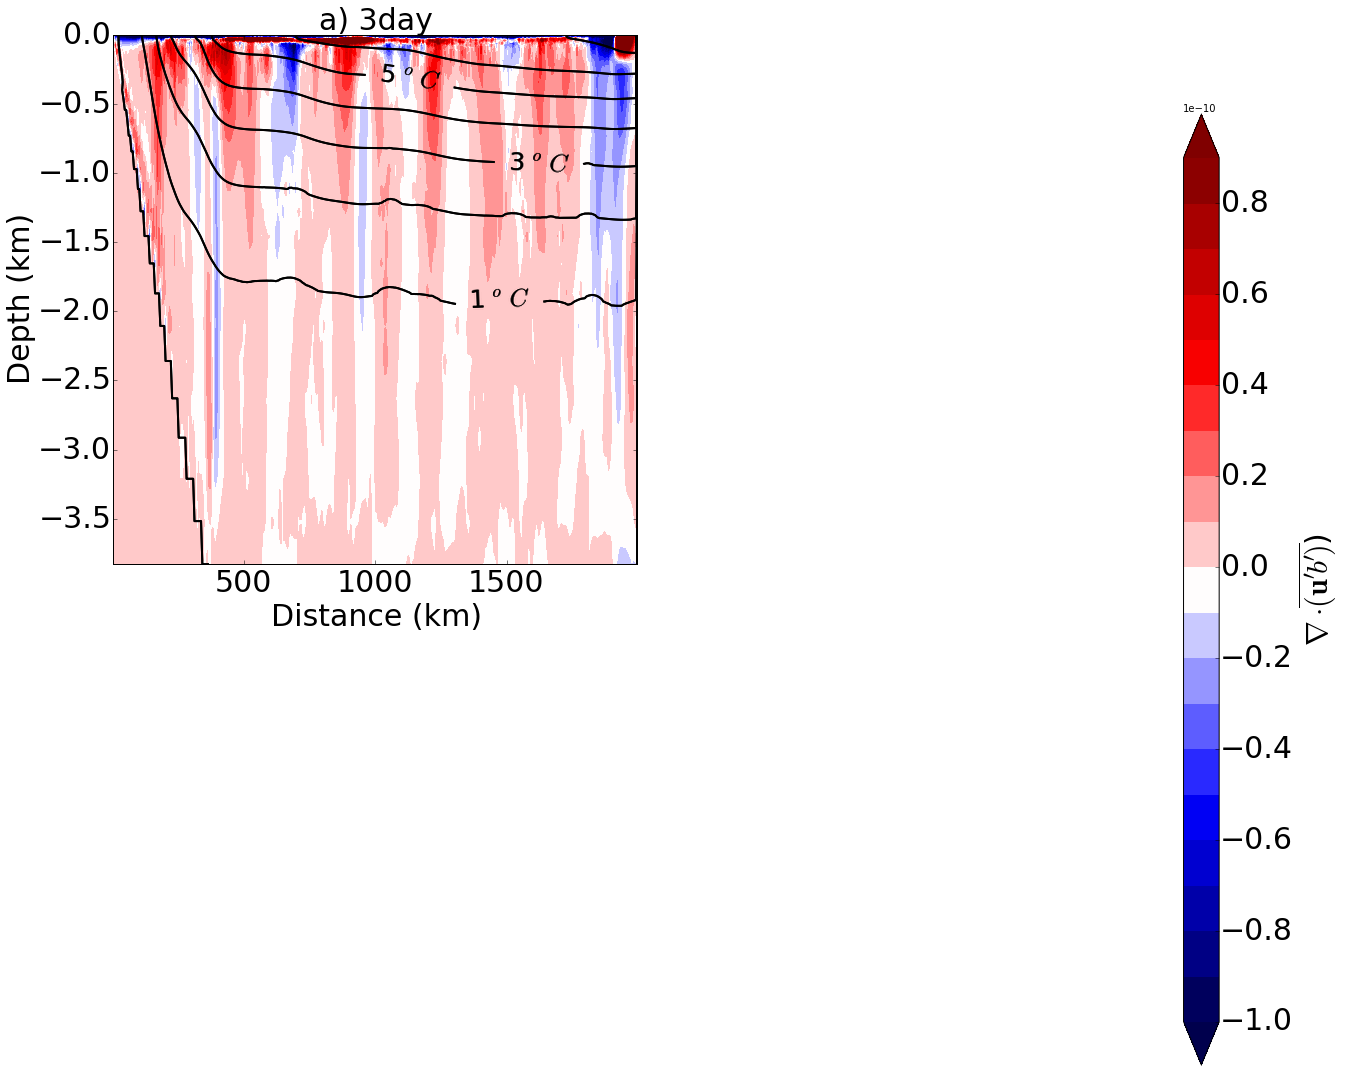

In [66]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)
Q_levs = (arange(-1,1,0.1))*10**-10
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    i=0
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  bfac* (c.ddy_cgrid_centered(VpTp) + c.ddz_cgrid_centered(WpTp)), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

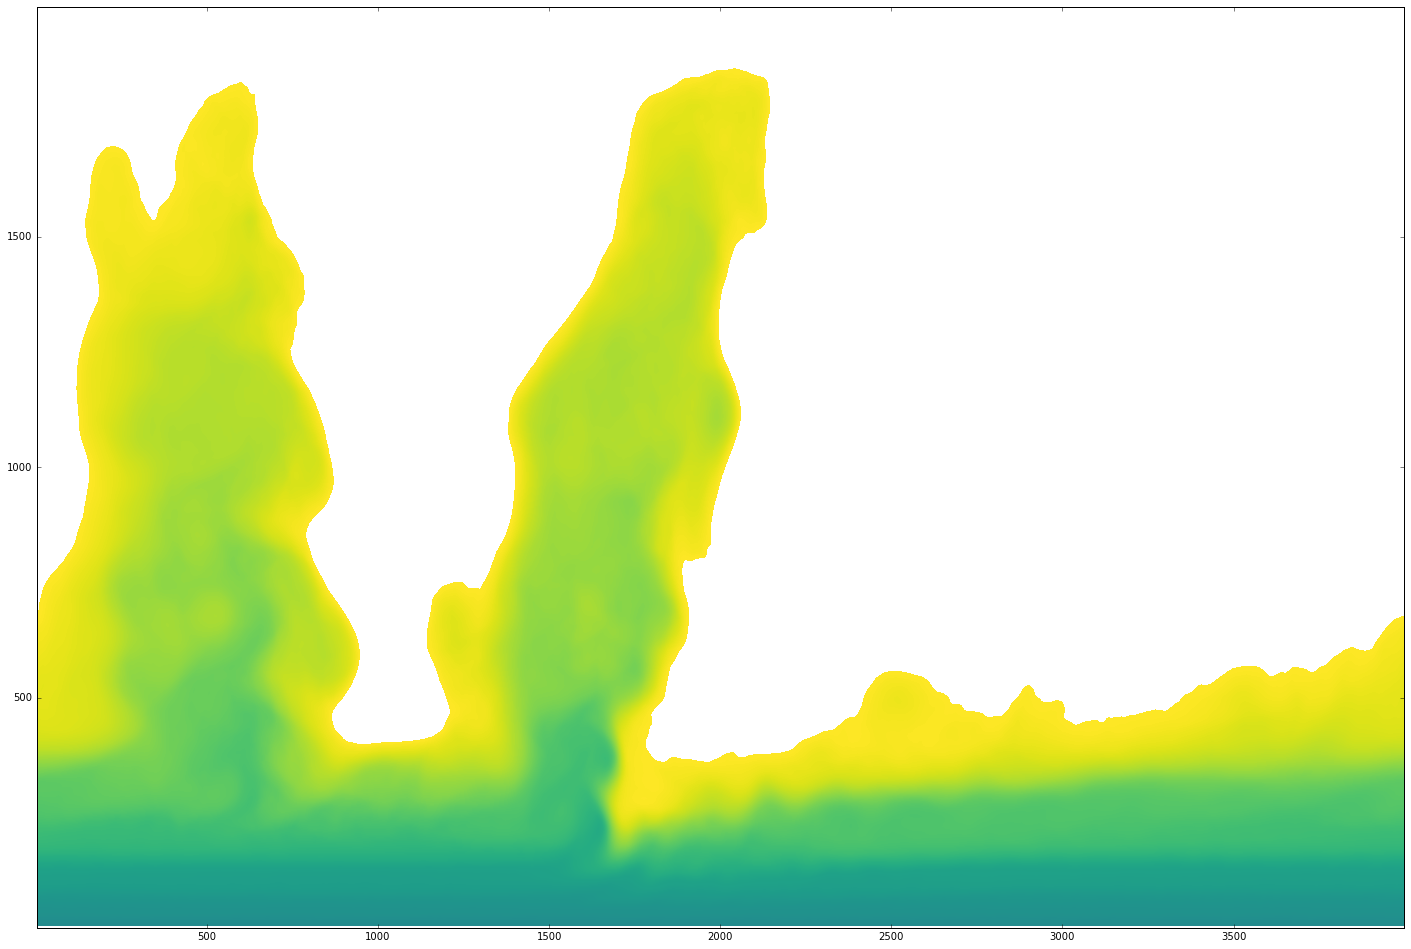

In [53]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-10.2, 3.4, .4)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
fname = x+'/'+str(tau[Runs[0]]+'/')
c = utils.ChannelSetup(output_dir=str(fname))
Q2_levs = (np.arange(-1,8,1))
p = plt.contourf(c.xc/1000, c.yc/1000,
           c.mnc_t('slice.nc','THETA',mask=c.HFacC)[0,:,:] , np.arange(-6.,6.2,.01),cmap=cm.viridis)

